In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

from scipy.stats import invgauss, norm

from itertools import permutations

%matplotlib inline

#### 10.7b

In [ ]:
T = np.array([.225, .262, .217, .240, .230, .229, .235, .217])
S = np.array([.209, .205, .196, .210, .202, .207, .224, .223, .220, .201])

In [ ]:
TS = np.concatenate((T, S), axis = 0)

In [ ]:
def test_statistic(x):
    return np.absolute(np.mean(x[: 8]) - np.mean(x[8: ]))

In [ ]:
def perm(x, n = 1000):
    pdata = np.zeros((1000,x.shape[0]))
    m = 0
#     count = 0
    while m < n:
        p = np.random.permutation(x)
        j = 0
        while j < m:
            
            if p == pdata[j:]
            
    for i in np.arange(1000):
        np.random.permutation(x)

In [ ]:
TS.shape

#### 10.12

In [2]:
def poisson_sample(l, n):
    """
    Generates n Poisson distributed samples with parameter l.
    """
    return np.random.poisson(lam = 1, size = n)

In [3]:
def wald_test(sample, n = 20, alpha = .05, null_lambda = 1):
    """
    Perfoms Wald test and returns p-value.
    """
    xbar = np.mean(sample)
    test_statistic = np.absolute((xbar - null_lambda)/ (null_lambda / n) ** 0.5)
    return  2 * (1 - norm.cdf(test_statistic))

In [4]:
def multwald(l = 1, n = 20, alpha = .05, null_lambda = 1, B = 10000):
    """
    Performs Wald test B times and return proportion of test where null hypothesis is rejected.
    """
    count = 0
    for i in np.arange(B):
        sample = poisson_sample(l, n)
        if wald_test(sample) < alpha:
            count += 1

    return count/B

In [5]:
multwald()

0.0548

#### 11.4b

In [6]:
mle_p1 = 3/5
mle_p2 = 4/5
mle_tau = mle_p2 - mle_p1

In [13]:
n = 100000
se2_boot = 0

for i in np.arange(n):
    p1_mean = np.mean(np.random.binomial(1, mle_p1, size = 50))
    p2_mean = np.mean(np.random.binomial(1, mle_p2, size = 50))
    se2_boot += ((p2_mean - p1_mean) - mle_tau) ** 2
se_boot = np.sqrt(se2_boot/n)
print (se_boot)

0.0895209919516


#### 11.4c

In [3]:
n = 1000

p1 = np.random.beta(31, 21, size = n)
p2 = np.random.beta(41, 11, size = n)

np.mean(p2 - p1)


0.19313379724512114

(array([ 0.001,  0.001,  0.002,  0.009,  0.013,  0.028,  0.069,  0.145,
         0.239,  0.359,  0.499,  0.633,  0.757,  0.85 ,  0.919,  0.965,
         0.985,  0.994,  0.998,  1.   ]),
 array([-0.13490767, -0.10488559, -0.07486352, -0.04484144, -0.01481936,
         0.01520271,  0.04522479,  0.07524686,  0.10526894,  0.13529102,
         0.16531309,  0.19533517,  0.22535724,  0.25537932,  0.2854014 ,
         0.31542347,  0.34544555,  0.37546762,  0.4054897 ,  0.43551178,
         0.46553385]),
 <a list of 20 Patch objects>)

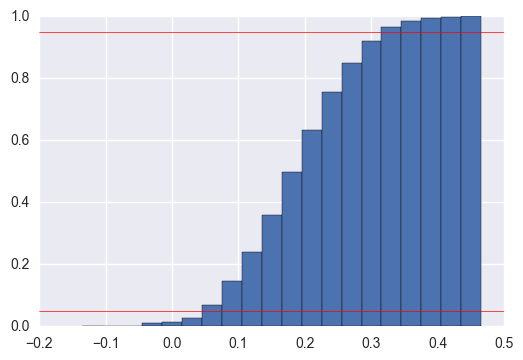

In [37]:
n = 1000

p1 = np.random.beta(31, 21, size = n)
p2 = np.random.beta(41, 11, size = n)

tau = p2 - p1

plt.axhline(y = 0.05, color = 'r', linewidth = 0.5)
plt.axhline(y = 0.95, color = 'r', linewidth = 0.5)
plt.hist(tau, cumulative = True, normed = True, bins = 20)
# i = 0
# savefilename = 'posteriorCI'
# while os.path.exists('{}{:d}.png'.format(savefilename, i)):
#     i += 1

# plt.savefig('{}{:d}.png'.format(savefilename, i))


#### 11.4d

-0.943973340847


(array([ 0.005,  0.015,  0.024,  0.062,  0.109,  0.175,  0.275,  0.397,
         0.531,  0.666,  0.792,  0.888,  0.948,  0.978,  0.992,  0.996,
         0.997,  0.999,  0.999,  1.   ]),
 array([-2.31221772, -2.15417526, -1.9961328 , -1.83809035, -1.68004789,
        -1.52200544, -1.36396298, -1.20592053, -1.04787807, -0.88983562,
        -0.73179316, -0.57375071, -0.41570825, -0.25766579, -0.09962334,
         0.05841912,  0.21646157,  0.37450403,  0.53254648,  0.69058894,
         0.84863139]),
 <a list of 20 Patch objects>)

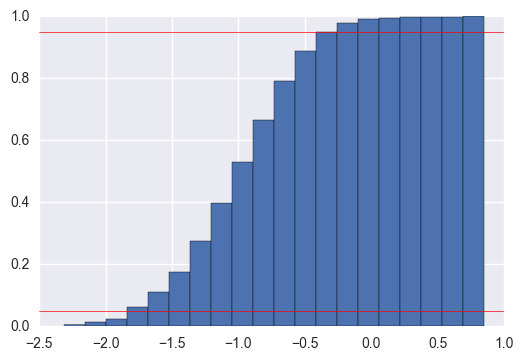

In [40]:
n = 1000

p1 = np.random.beta(31, 21, size = n)
p2 = np.random.beta(41, 11, size = n)

psi_distribution = np.log((p1 / (1 - p1)) / (p2 / (1 - p2)))

psi_estimate = np.mean(psi_distribution)

print (psi_estimate)

plt.axhline(y = 0.05, color = 'r', linewidth = 0.5)
plt.axhline(y = 0.95, color = 'r', linewidth = 0.5)

plt.hist(psi_distribution, cumulative = True, normed = True, bins = 20)
# i = 0
# savefilename = 'psiposteriorCI'
# while os.path.exists('{}{:d}.png'.format(savefilename, i)):
#     i += 1

# plt.savefig('{}{:d}.png'.format(savefilename, i))
